## <span style="color:#db7d60">Setup</span>

In [2]:
%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *
import data_manager
import analysis as anal

import vector
from particle import Particle
from particle import PDGID

plt.rcParams['figure.figsize'] = (21, 6)

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

/global/homes/e/eshy/.local/lib/python3.11/site-packages/coffea/nanoevents/schemas/fcc.py:5: FutureWarning: In version 2025.1.0 (target date: 2024-12-31 11:59:59-06:00), this will be an error.
To raise these warnings as errors (and get stack traces to find out where they're called), run
    import warnings
    warnings.filterwarnings("error", module="coffea.*")
after the first `import coffea` or use `@pytest.mark.filterwarnings("error:::coffea.*")` in pytest.
Issue: coffea.nanoevents.methods.vector will be removed and replaced with scikit-hep vector. Nanoevents schemas internal to coffea will be migrated. Otherwise please consider using that package!.
  from coffea.nanoevents.methods import vector


## <span style="color:#db7d60">Analysis</span>

(<Figure size 6300x1800 with 1 Axes>, <Axes: >)

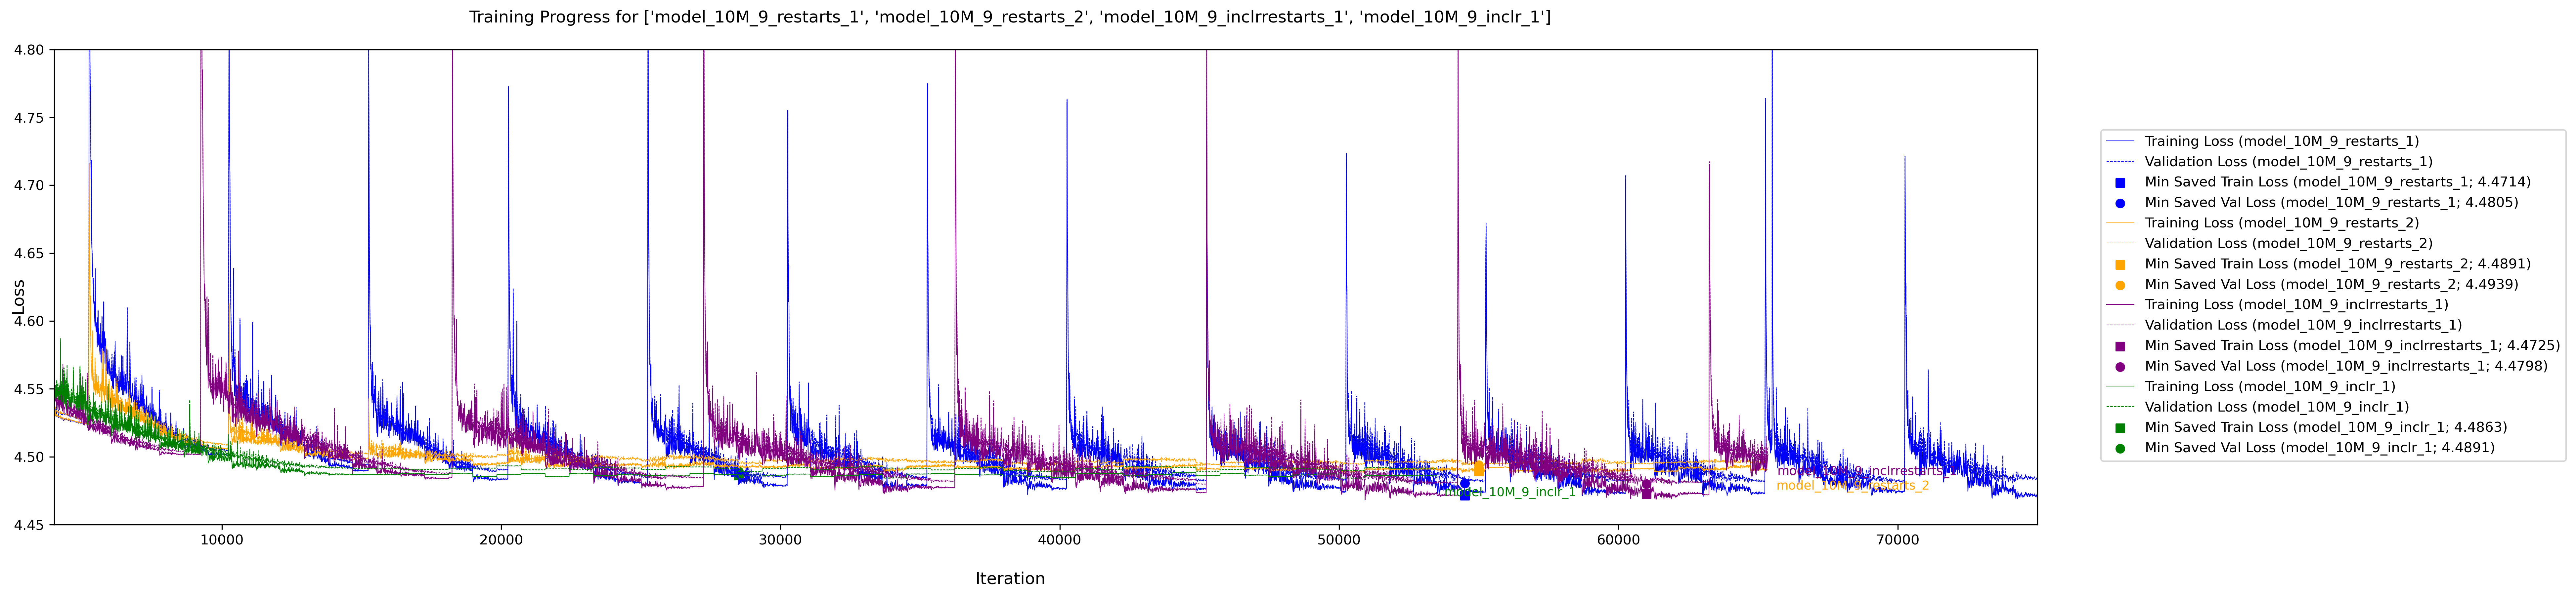

In [5]:
anal.plotting.plot_training_run(['model_10M_9_restarts_1', 'model_10M_9_restarts_2', 'model_10M_9_inclrrestarts_1', 'model_10M_9_inclr_1'], use_log=False, y_lim=(4.45, 4.8), x_lim=(4000, 75000))

(<Figure size 6300x1800 with 1 Axes>, <Axes: >)

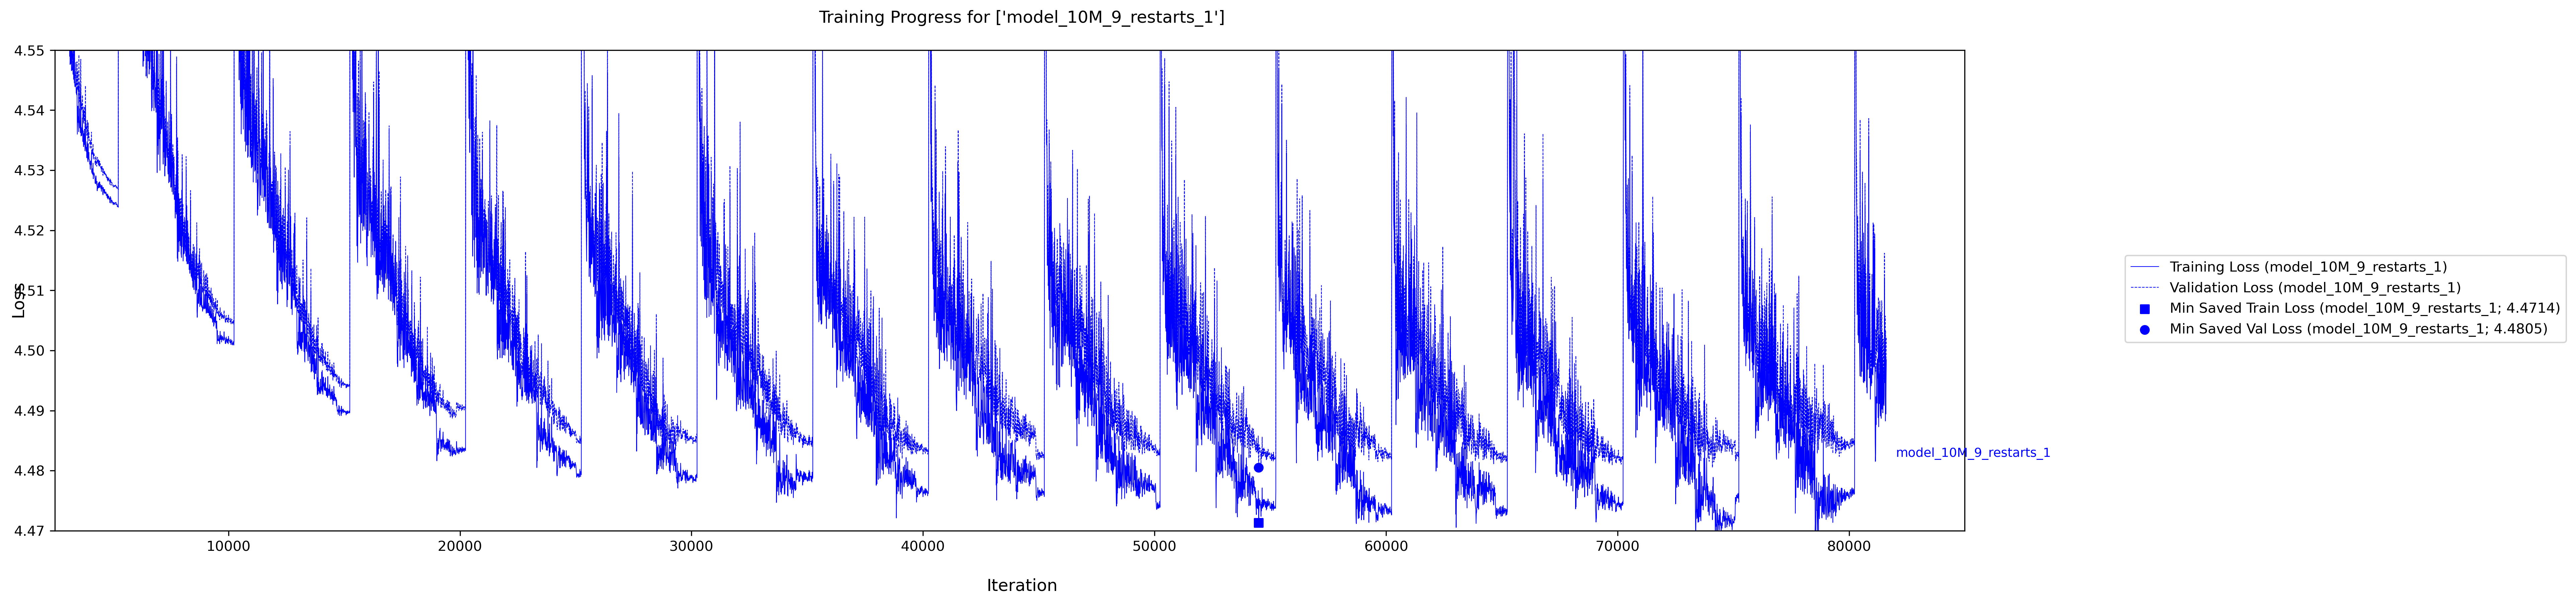

In [67]:
anal.plotting.plot_training_run(['model_10M_9_restarts_1'], use_log=False, y_lim=(4.47, 4.55), x_lim=(2500, 85000))

(<Figure size 6300x1800 with 1 Axes>, <Axes: >)

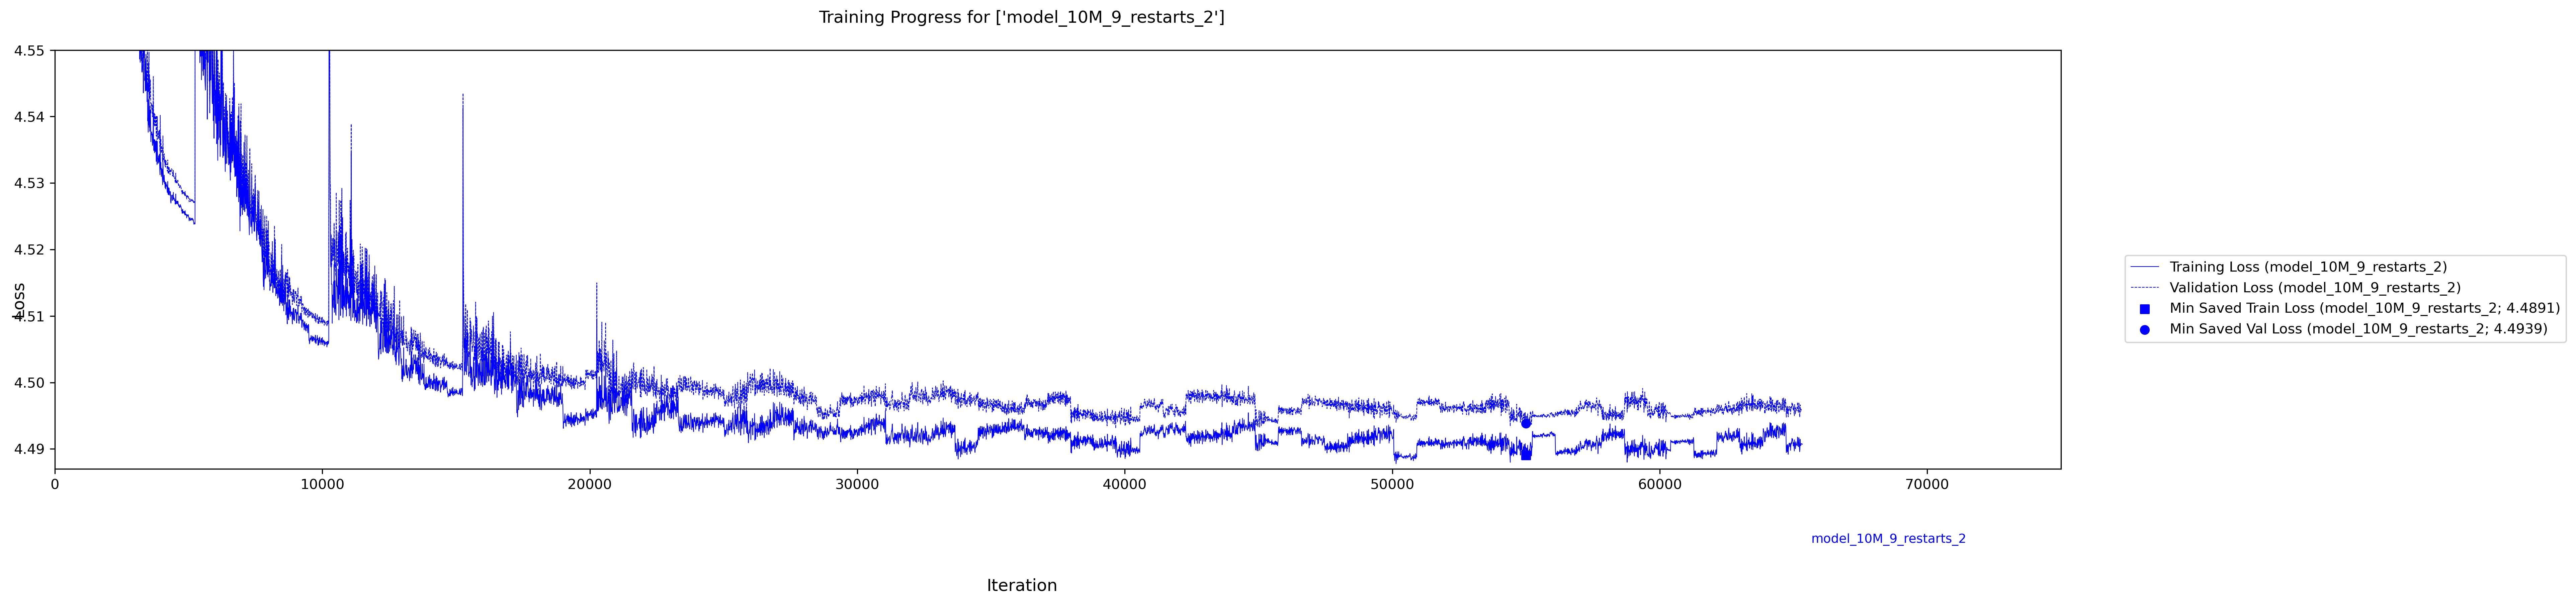

In [21]:
anal.plotting.plot_training_run(['model_10M_9_restarts_2'], use_log=False, y_lim=(4.487, 4.55), x_lim=(0, 75000))

(<Figure size 6300x1800 with 1 Axes>, <Axes: >)

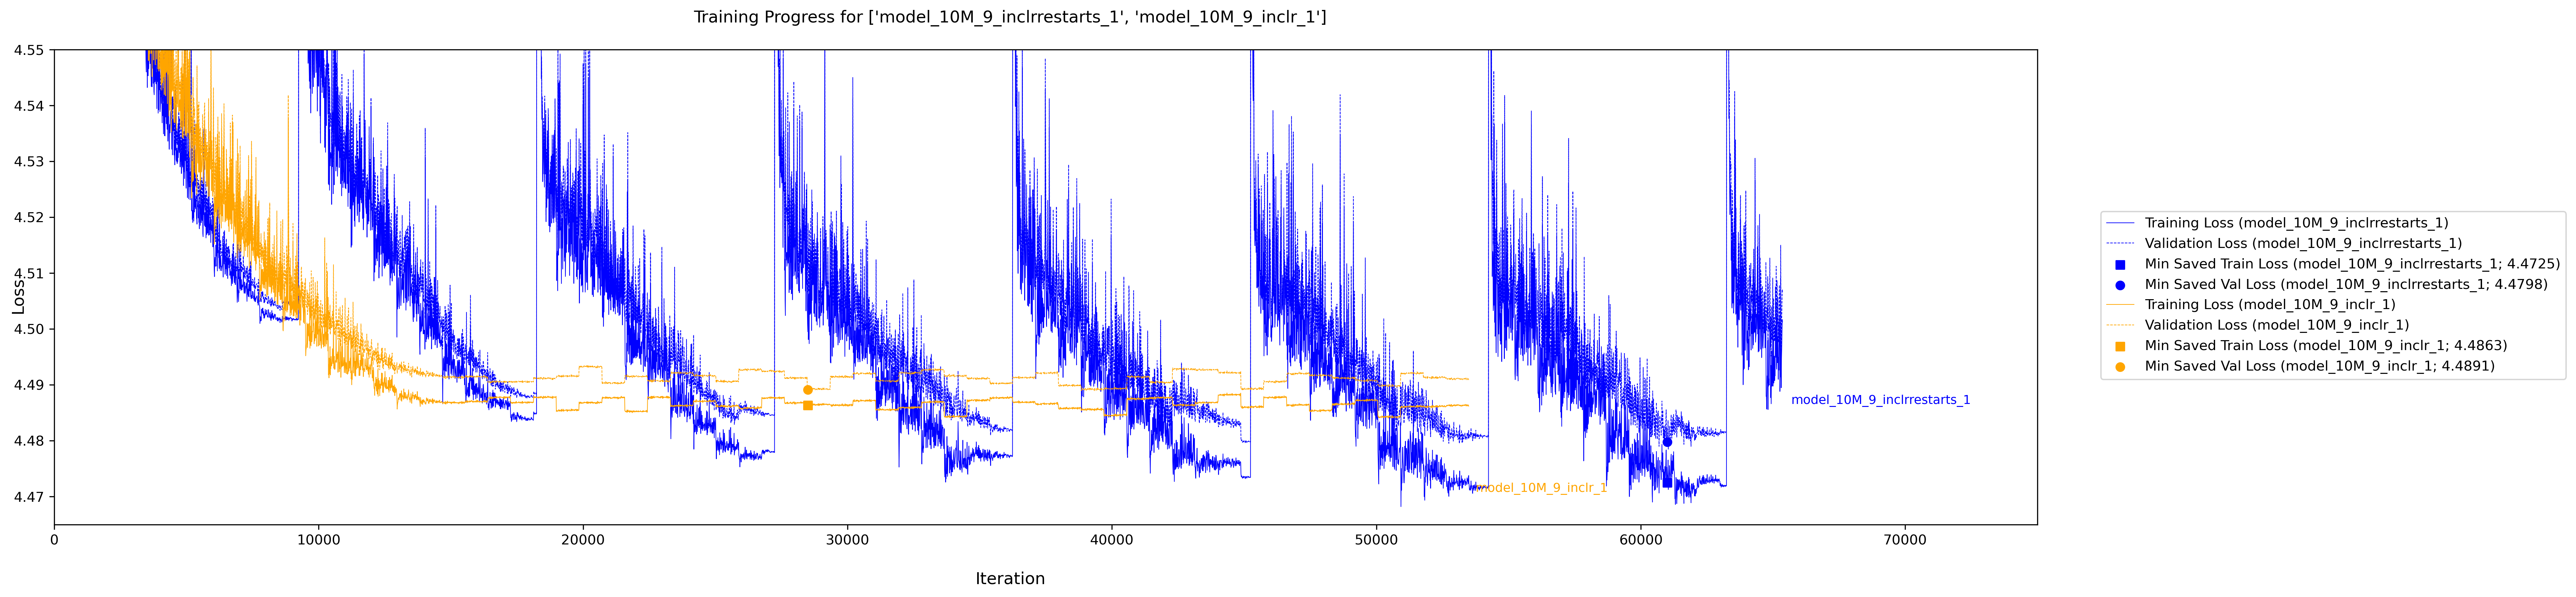

In [4]:
anal.plotting.plot_training_run(['model_10M_9_inclrrestarts_1', 'model_10M_9_inclr_1'], use_log=False, y_lim=(4.465, 4.55), x_lim=(0, 75000), plot_lr_schedule=False)

(<Figure size 6300x1800 with 2 Axes>, <Axes: >)

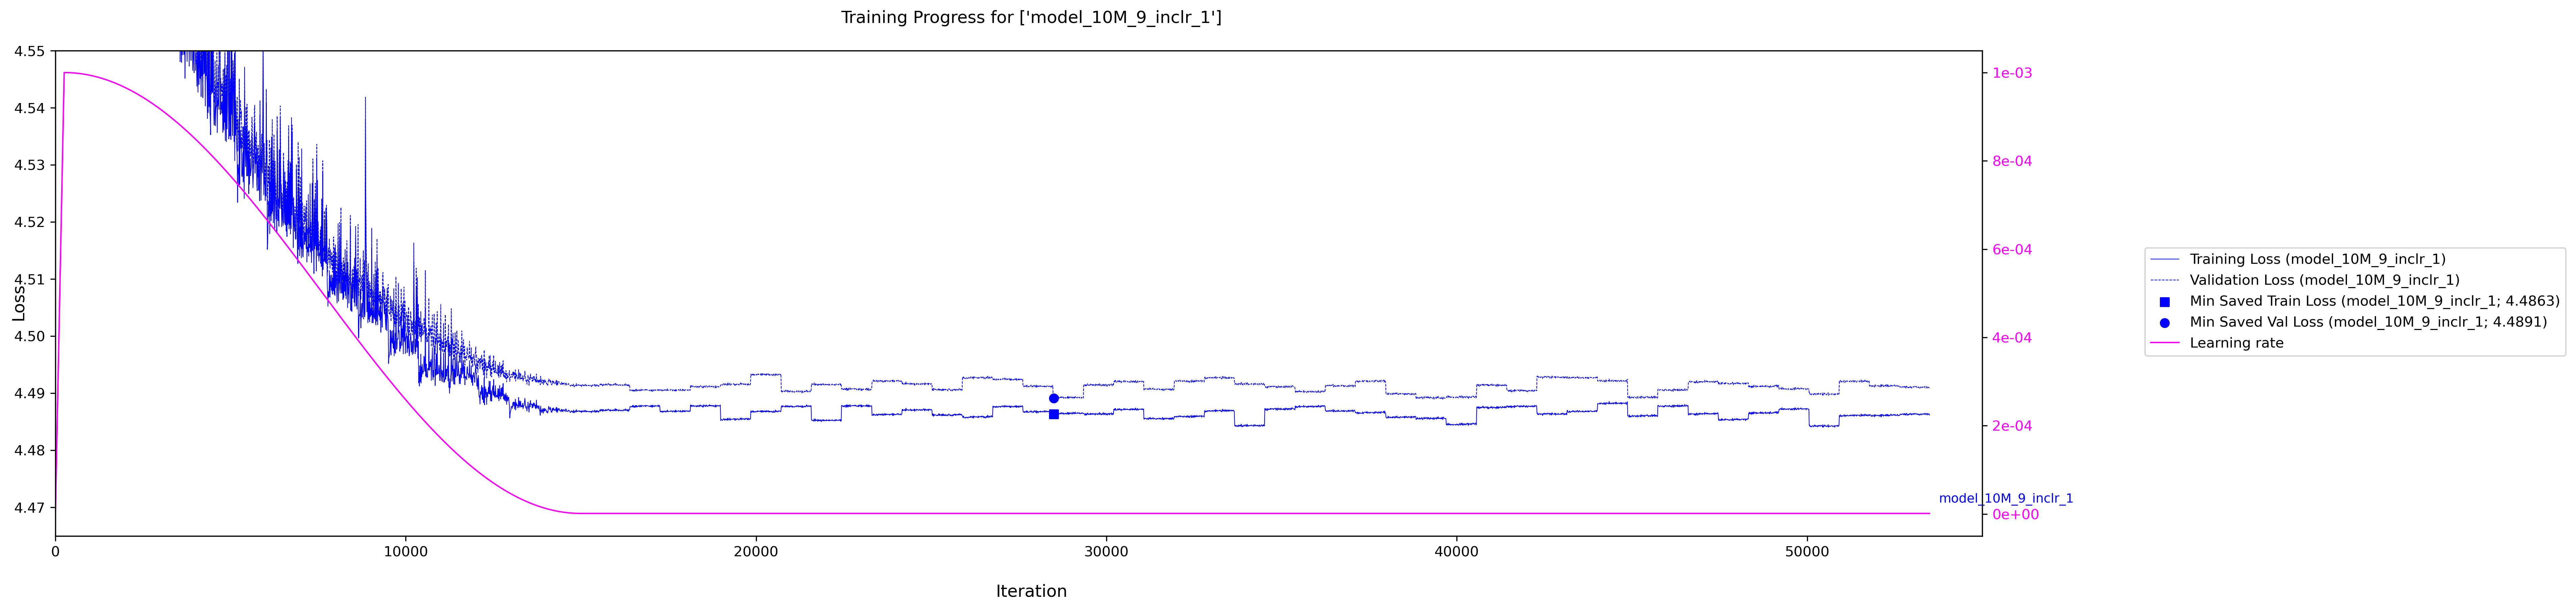

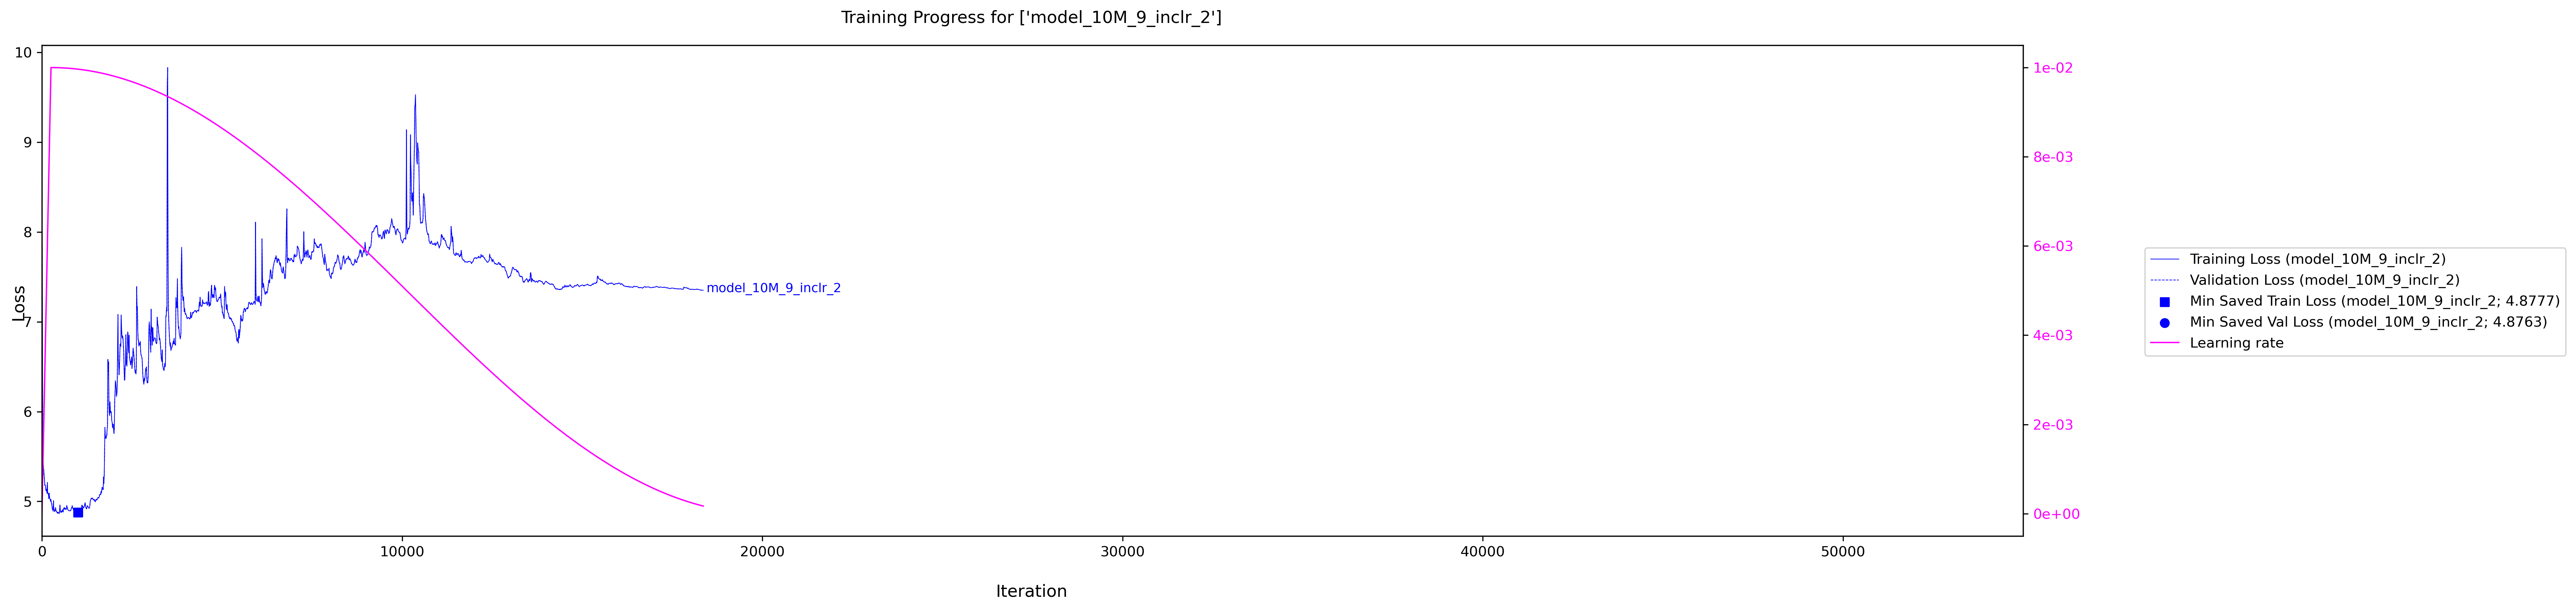

In [12]:
anal.plotting.plot_training_run(['model_10M_9_inclr_1'], use_log=False, y_lim=(4.465, 4.55), x_lim=(0, 55000), plot_lr_schedule=True)
anal.plotting.plot_training_run(['model_10M_9_inclr_2'], use_log=False, x_lim=(0, 55000), plot_lr_schedule=True)

In [5]:
df = anal.tables.get_default_df([
    'model_10M_9_restarts_1', 'model_10M_9_restarts_2',
    'model_10M_9_inclrrestarts_1', 'model_10M_9_inclrrestarts_2',
    'model_10M_9_inclr_1', 'model_10M_9_inclr_2',
    'model_10M_9_distsensloss_1',
    'model_10M_9_5', 'model_10M_9_1', 'model_10M_9_2'
])

display(df[['model_name', 'iters_saved', 'min_saved_train_loss', 'min_saved_val_loss'] + anal.tables.model_config_columns])
display(df[['model_name', 'iters_saved', 'min_saved_train_loss', 'min_saved_val_loss'] + anal.tables.model_config_columns].sort_values(by='min_saved_val_loss', ascending=True))

model_name  iters_saved  min_saved_train_loss  min_saved_val_loss  batch_size  block_size  learning_rate    min_lr  lr_decay_iters                         lr_scheduler  n_layer  n_head  n_embd   scheme preparation_name
0       model_10M_9_restarts_1        54500              4.471352            4.480517         128         NaN          0.001  0.000010            5000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
1       model_10M_9_restarts_2        55000              4.489090            4.493869         128         NaN          0.001  0.000010            5000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
2  model_10M_9_inclrrestarts_1        61000              4.472512            4.479803         128         NaN          0.001  0.000001            9000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
3  model_10M_9_inclrrestarts_2          250              4.926623            4.926581         128         NaN          0.010  0.000001           13000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
4          model_10M_9_inclr_1        28500              4.486310            4.489137         128         NaN          0.001  0.000001           15000         cosine_annealing_with_warmup        4       2     512  unknown          unknown
5          model_10M_9_inclr_2         1000              4.877711            4.876272         128         NaN          0.010  0.000001           20000         cosine_annealing_with_warmup        4       2     512  unknown          unknown
6   model_10M_9_distsensloss_1        61000              4.473290            4.480695         128         NaN          0.001  0.000001            9000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
7                model_10M_9_5        13500              4.466295            4.472854         128         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup       48     128    1024  unknown          unknown
8                model_10M_9_1         4000              4.500697            4.506568         256         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup       24      16    1024  unknown          unknown
9                model_10M_9_2         3250              4.531094            4.535140         256         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup        6       4    1024  unknown          unknown

model_name  iters_saved  min_saved_train_loss  min_saved_val_loss  batch_size  block_size  learning_rate    min_lr  lr_decay_iters                         lr_scheduler  n_layer  n_head  n_embd   scheme preparation_name
7                model_10M_9_5        13500              4.466295            4.472854         128         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup       48     128    1024  unknown          unknown
2  model_10M_9_inclrrestarts_1        61000              4.472512            4.479803         128         NaN          0.001  0.000001            9000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
0       model_10M_9_restarts_1        54500              4.471352            4.480517         128         NaN          0.001  0.000010            5000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
6   model_10M_9_distsensloss_1        61000              4.473290            4.480695         128         NaN          0.001  0.000001            9000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
4          model_10M_9_inclr_1        28500              4.486310            4.489137         128         NaN          0.001  0.000001           15000         cosine_annealing_with_warmup        4       2     512  unknown          unknown
1       model_10M_9_restarts_2        55000              4.489090            4.493869         128         NaN          0.001  0.000010            5000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown
8                model_10M_9_1         4000              4.500697            4.506568         256         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup       24      16    1024  unknown          unknown
9                model_10M_9_2         3250              4.531094            4.535140         256         NaN          0.001  0.000010            5000         cosine_annealing_with_warmup        6       4    1024  unknown          unknown
5          model_10M_9_inclr_2         1000              4.877711            4.876272         128         NaN          0.010  0.000001           20000         cosine_annealing_with_warmup        4       2     512  unknown          unknown
3  model_10M_9_inclrrestarts_2          250              4.926623            4.926581         128         NaN          0.010  0.000001           13000  cosine_annealing_with_warm_restarts        4       2     512  unknown          unknown